In [95]:
# Importing dependencies.
import numpy as n_y
from matplotlib import pyplot as mlt
import pandas as ps
from matplotlib.colors import ListedColormap

Creation of LINEAR_CATEGORIZER Class

In [96]:
class LINEAR_CATEGORIZER(object):
    #Initiating the learning rate and number of iterations.
    def __init__(self, Learn_Rate=0.5, Iterations=10):
        self.learn_rate = Learn_Rate
        self.Iterations = Iterations
        self.errors = []
        self.weights = n_y.zeros(1 + x.shape[1])
    
    # Defining fit method for model training.
    def fit(self, x, y):
        self.weights = n_y.zeros(1 + x.shape[1])
        for i in range(self.Iterations):
            for xi, target in zip(x, y):
                update = self.learn_rate * (target - self.predict(xi))
                self.weights[1:] += update*xi
                self.weights[0] += update
        return self
    
    # Net Input method for summing the given matrix inputs and their corresponding weights.
    def net_input(self, x):
        return n_y.dot(x, self.weights[1:]) + self.weights[0]
    
    # Predict method for predicting the classification of data inputs.
    def predict(self, x):
        return n_y.where(self.net_input(x) >= 0.0, 1, -1)

Data Retrieval and Preparation

In [97]:
iris_data = ps.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)


Linear Classifier for classying Iris-Setosa and Iris-Versicolor

In [98]:
def plot_decision_surface(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'green', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(n_y.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = n_y.meshgrid(n_y.arange(x1_min, x1_max, resolution),
                           n_y.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(n_y.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    mlt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    mlt.xlim(xx1.min(), xx1.max())
    mlt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(n_y.unique(y)):
        mlt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [99]:
#Sepal Length and Petal Length are selected as Training Features
#Iris-Setosa is replaced by -1
#Iris-Versicolor is replaced by 1

x = iris_data.iloc[0:100, [0, 2]].values
y = iris_data.iloc[0:100, 4].values
y = n_y.where(y == 'Iris-setosa', -1, 1)

In [100]:
Classifier1 = LINEAR_CATEGORIZER(Learn_Rate=0.01, Iterations=50)
Classifier1.fit(x, y)

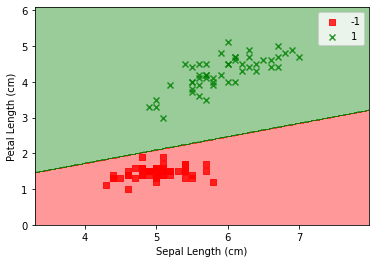

In [101]:
plot_decision_surface(x, y, classifier=Classifier1)
mlt.xlabel('Sepal Length (cm)')
mlt.ylabel('Petal Length (cm)')
mlt.legend()
mlt.show()

In [102]:
#Sepal Width and Petal Width are selected as Training Features
#Iris-Setosa is replaced by -1
#Iris-Versicolor is replaced by 1

x = iris_data.iloc[0:100, [1, 3]].values
y = iris_data.iloc[0:100, 4].values
y = n_y.where(y == 'Iris-setosa', -1, 1)

In [103]:
Classifier2 = LINEAR_CATEGORIZER(Learn_Rate=0.01, Iterations=50)
Classifier2.fit(x, y)

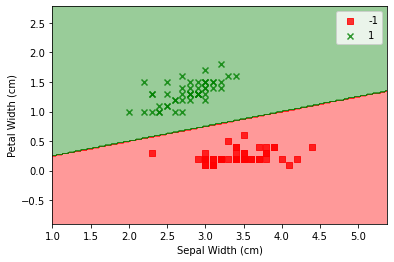

In [104]:
plot_decision_surface(x, y, classifier=Classifier2)
mlt.xlabel('Sepal Width (cm)')
mlt.ylabel('Petal Width (cm)')
mlt.legend()
mlt.show()

Linear Classifier for classying Iris-Versicolor and Iris-Virginica

In [105]:
#Sepal Length and Petal Length are selected as Training Features
#Iris-Versicolor is replaced by -1
#Iris-Virginica is replaced by 1

x = iris_data.iloc[50:100, [0, 2]].values
y = iris_data.iloc[50:100, 4].values
y = n_y.where(y == 'Iris-versicolor', -1, 1)

In [106]:
Classifier3 = LINEAR_CATEGORIZER(Learn_Rate=0.02, Iterations=100)
Classifier3.fit(x, y)

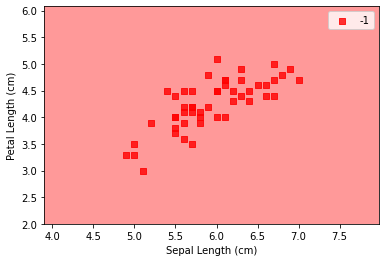

In [107]:
plot_decision_surface(x, y, classifier=Classifier3)
mlt.xlabel('Sepal Length (cm)')
mlt.ylabel('Petal Length (cm)')
mlt.legend()
mlt.show()

In [108]:
#Sepal Width and Petal Width are selected as Training Features
#Iris-Versicolor is replaced by -1
#Iris-Virginica is replaced by 1

x = iris_data.iloc[50:100, [1, 3]].values
y = iris_data.iloc[50:100, 4].values
y = n_y.where(y == 'Iris-versicolor', -1, 1)

In [109]:
Classifier4 = LINEAR_CATEGORIZER(Learn_Rate=0.01, Iterations=50)
Classifier4.fit(x, y)

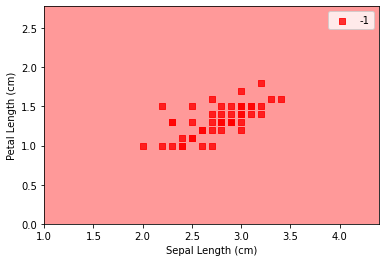

In [110]:
plot_decision_surface(x, y, classifier=Classifier4)
mlt.xlabel('Sepal Length (cm)')
mlt.ylabel('Petal Length (cm)')
mlt.legend()
mlt.show()

Linear Classifier for classifying Iris-Setosa and Iris-Virginica

In [111]:
#Sepal Length and Petal Length are selected as Training Features
#Iris-Setosa is replaced by -1
#Iris-Virginica is replaced by 1

x = iris_data.loc[(iris_data[4] == 'Iris-setosa') | (iris_data[4] == 'Iris-virginica'), [0, 2]].values
y = iris_data.loc[(iris_data[4] == 'Iris-setosa') | (iris_data[4] == 'Iris-virginica'), 4].values
print(y)
y = n_y.where(y == 'Iris-setosa', -1, 1)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virgini

In [112]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [113]:
Classifier5 = LINEAR_CATEGORIZER(Learn_Rate=0.02, Iterations=100)
Classifier5.fit(x, y)

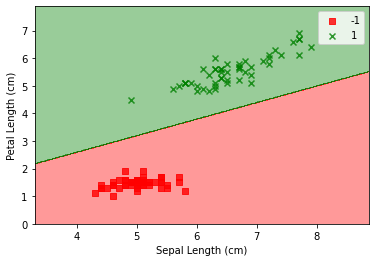

In [114]:
plot_decision_surface(x, y, classifier=Classifier5)
mlt.xlabel('Sepal Length (cm)')
mlt.ylabel('Petal Length (cm)')
mlt.legend()
mlt.show()

In [115]:
#Sepal Width and Petal Width are selected as Training Features
#Iris-Setosa is replaced by -1
#Iris-Virginica is replaced by 1

x = iris_data.loc[(iris_data[4] == 'Iris-setosa') | (iris_data[4] == 'Iris-virginica'), [1, 3]].values
y = iris_data.loc[(iris_data[4] == 'Iris-setosa') | (iris_data[4] == 'Iris-virginica'), 4].values
print(y)
y = n_y.where(y == 'Iris-setosa', -1, 1)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virgini

In [116]:
Classifier6 = LINEAR_CATEGORIZER(Learn_Rate=0.02, Iterations=100)
Classifier6.fit(x, y)

OBSERVATIONS

Linear categorization making a clear distinction is obtained in case of 

1 ) Iris-Setosa vs Iris-Versicolor
2) Iris-Setosa vs Iris-Virginica

It is not obtained in case of Iris-Versicolor vs Iris-Virginica.

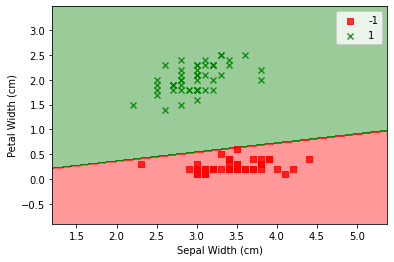

In [117]:
plot_decision_surface(x, y, classifier=Classifier6)
mlt.xlabel('Sepal Width (cm)')
mlt.ylabel('Petal Width (cm)')
mlt.legend()
mlt.show()